In [16]:
import pandas as pd
import numpy as np
import requests

df=pd.read_csv('https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/cars.csv')
df.to_csv('cars.csv')

In [17]:
df.isna().sum()

name           0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [18]:
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...
887,Ta,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,2014,"1,80,000",Petrol,NaN


In [19]:
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [20]:
df=df.dropna()

In [21]:
df['fuel_type'].value_counts()

fuel_type
Petrol    440
Diesel    395
LPG         2
Name: count, dtype: int64

In [22]:
df = df[df.Price != 'Ask For Price']

In [23]:
df['Price']

0        80,000
1      4,25,000
3      3,25,000
4      5,75,000
6      1,75,000
         ...   
883    2,70,000
885    1,10,000
886    3,00,000
888    2,60,000
889    3,90,000
Name: Price, Length: 816, dtype: object

In [24]:
df=df[df.values != 'Ask For Price']

In [25]:
df["kms_driven"].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [26]:
df['Price'] = df['Price'].str.replace(r',', '', regex=True).astype(float)
df['kms_driven'] = df['kms_driven'].str.slice(stop=-4)
df['kms_driven'] = df['kms_driven'].str.replace(r',', '', regex=True).astype(int)
df

,name,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,2007,80000.0,45000,Petrol
1,Mahindra Jeep CL550 MDI,2006,425000.0,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,2014,325000.0,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,2014,575000.0,36000,Diesel
6,Ford Figo,2012,175000.0,41000,Diesel
...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,2011,270000.0,50000,Petrol
885,Tata Indica V2 DLE BS III,2009,110000.0,30000,Diesel
886,Toyota Corolla Altis,2009,300000.0,132000,Petrol
888,Tata Zest XM Diesel,2018,260000.0,27000,Diesel


In [27]:
df['house'] = df['name'].str.extract(r'^(\S+)')
df.drop('name',axis=1)

,year,Price,kms_driven,fuel_type,house
0,2007,80000.0,45000,Petrol,Hyundai
1,2006,425000.0,40,Diesel,Mahindra
3,2014,325000.0,28000,Petrol,Hyundai
4,2014,575000.0,36000,Diesel,Ford
6,2012,175000.0,41000,Diesel,Ford
...,...,...,...,...,...
883,2011,270000.0,50000,Petrol,Maruti
885,2009,110000.0,30000,Diesel,Tata
886,2009,300000.0,132000,Petrol,Toyota
888,2018,260000.0,27000,Diesel,Tata


In [28]:
df['Price']=df['Price'].apply(lambda x: x/100) 
df=df.drop(columns='name')
df.head(20)
df.to_csv('cars_scremated.csv')

In [29]:
one_hot=pd.get_dummies(df['fuel_type'])
df=df.drop('fuel_type',axis=1)
df = df.join(one_hot)
df

,year,Price,kms_driven,house,Diesel,LPG,Petrol
0,2007,800.0,45000,Hyundai,False,False,True
1,2006,4250.0,40,Mahindra,True,False,False
3,2014,3250.0,28000,Hyundai,False,False,True
4,2014,5750.0,36000,Ford,True,False,False
6,2012,1750.0,41000,Ford,True,False,False
...,...,...,...,...,...,...,...
883,2011,2700.0,50000,Maruti,False,False,True
885,2009,1100.0,30000,Tata,True,False,False
886,2009,3000.0,132000,Toyota,False,False,True
888,2018,2600.0,27000,Tata,True,False,False


In [30]:
df['name'].unique()

KeyError: 'name'

In [ ]:
df['house'] = df['name'].str.extract(r'^(\S+)')
df.drop('name',axis=1)

,year,Price,kms_driven,Diesel,LPG,Petrol,house
0,2007,800.0,45000,False,False,True,Hyundai
1,2006,4250.0,40,True,False,False,Mahindra
3,2014,3250.0,28000,False,False,True,Hyundai
4,2014,5750.0,36000,True,False,False,Ford
6,2012,1750.0,41000,True,False,False,Ford
...,...,...,...,...,...,...,...
883,2011,2700.0,50000,False,False,True,Maruti
885,2009,1100.0,30000,True,False,False,Tata
886,2009,3000.0,132000,False,False,True,Toyota
888,2018,2600.0,27000,True,False,False,Tata


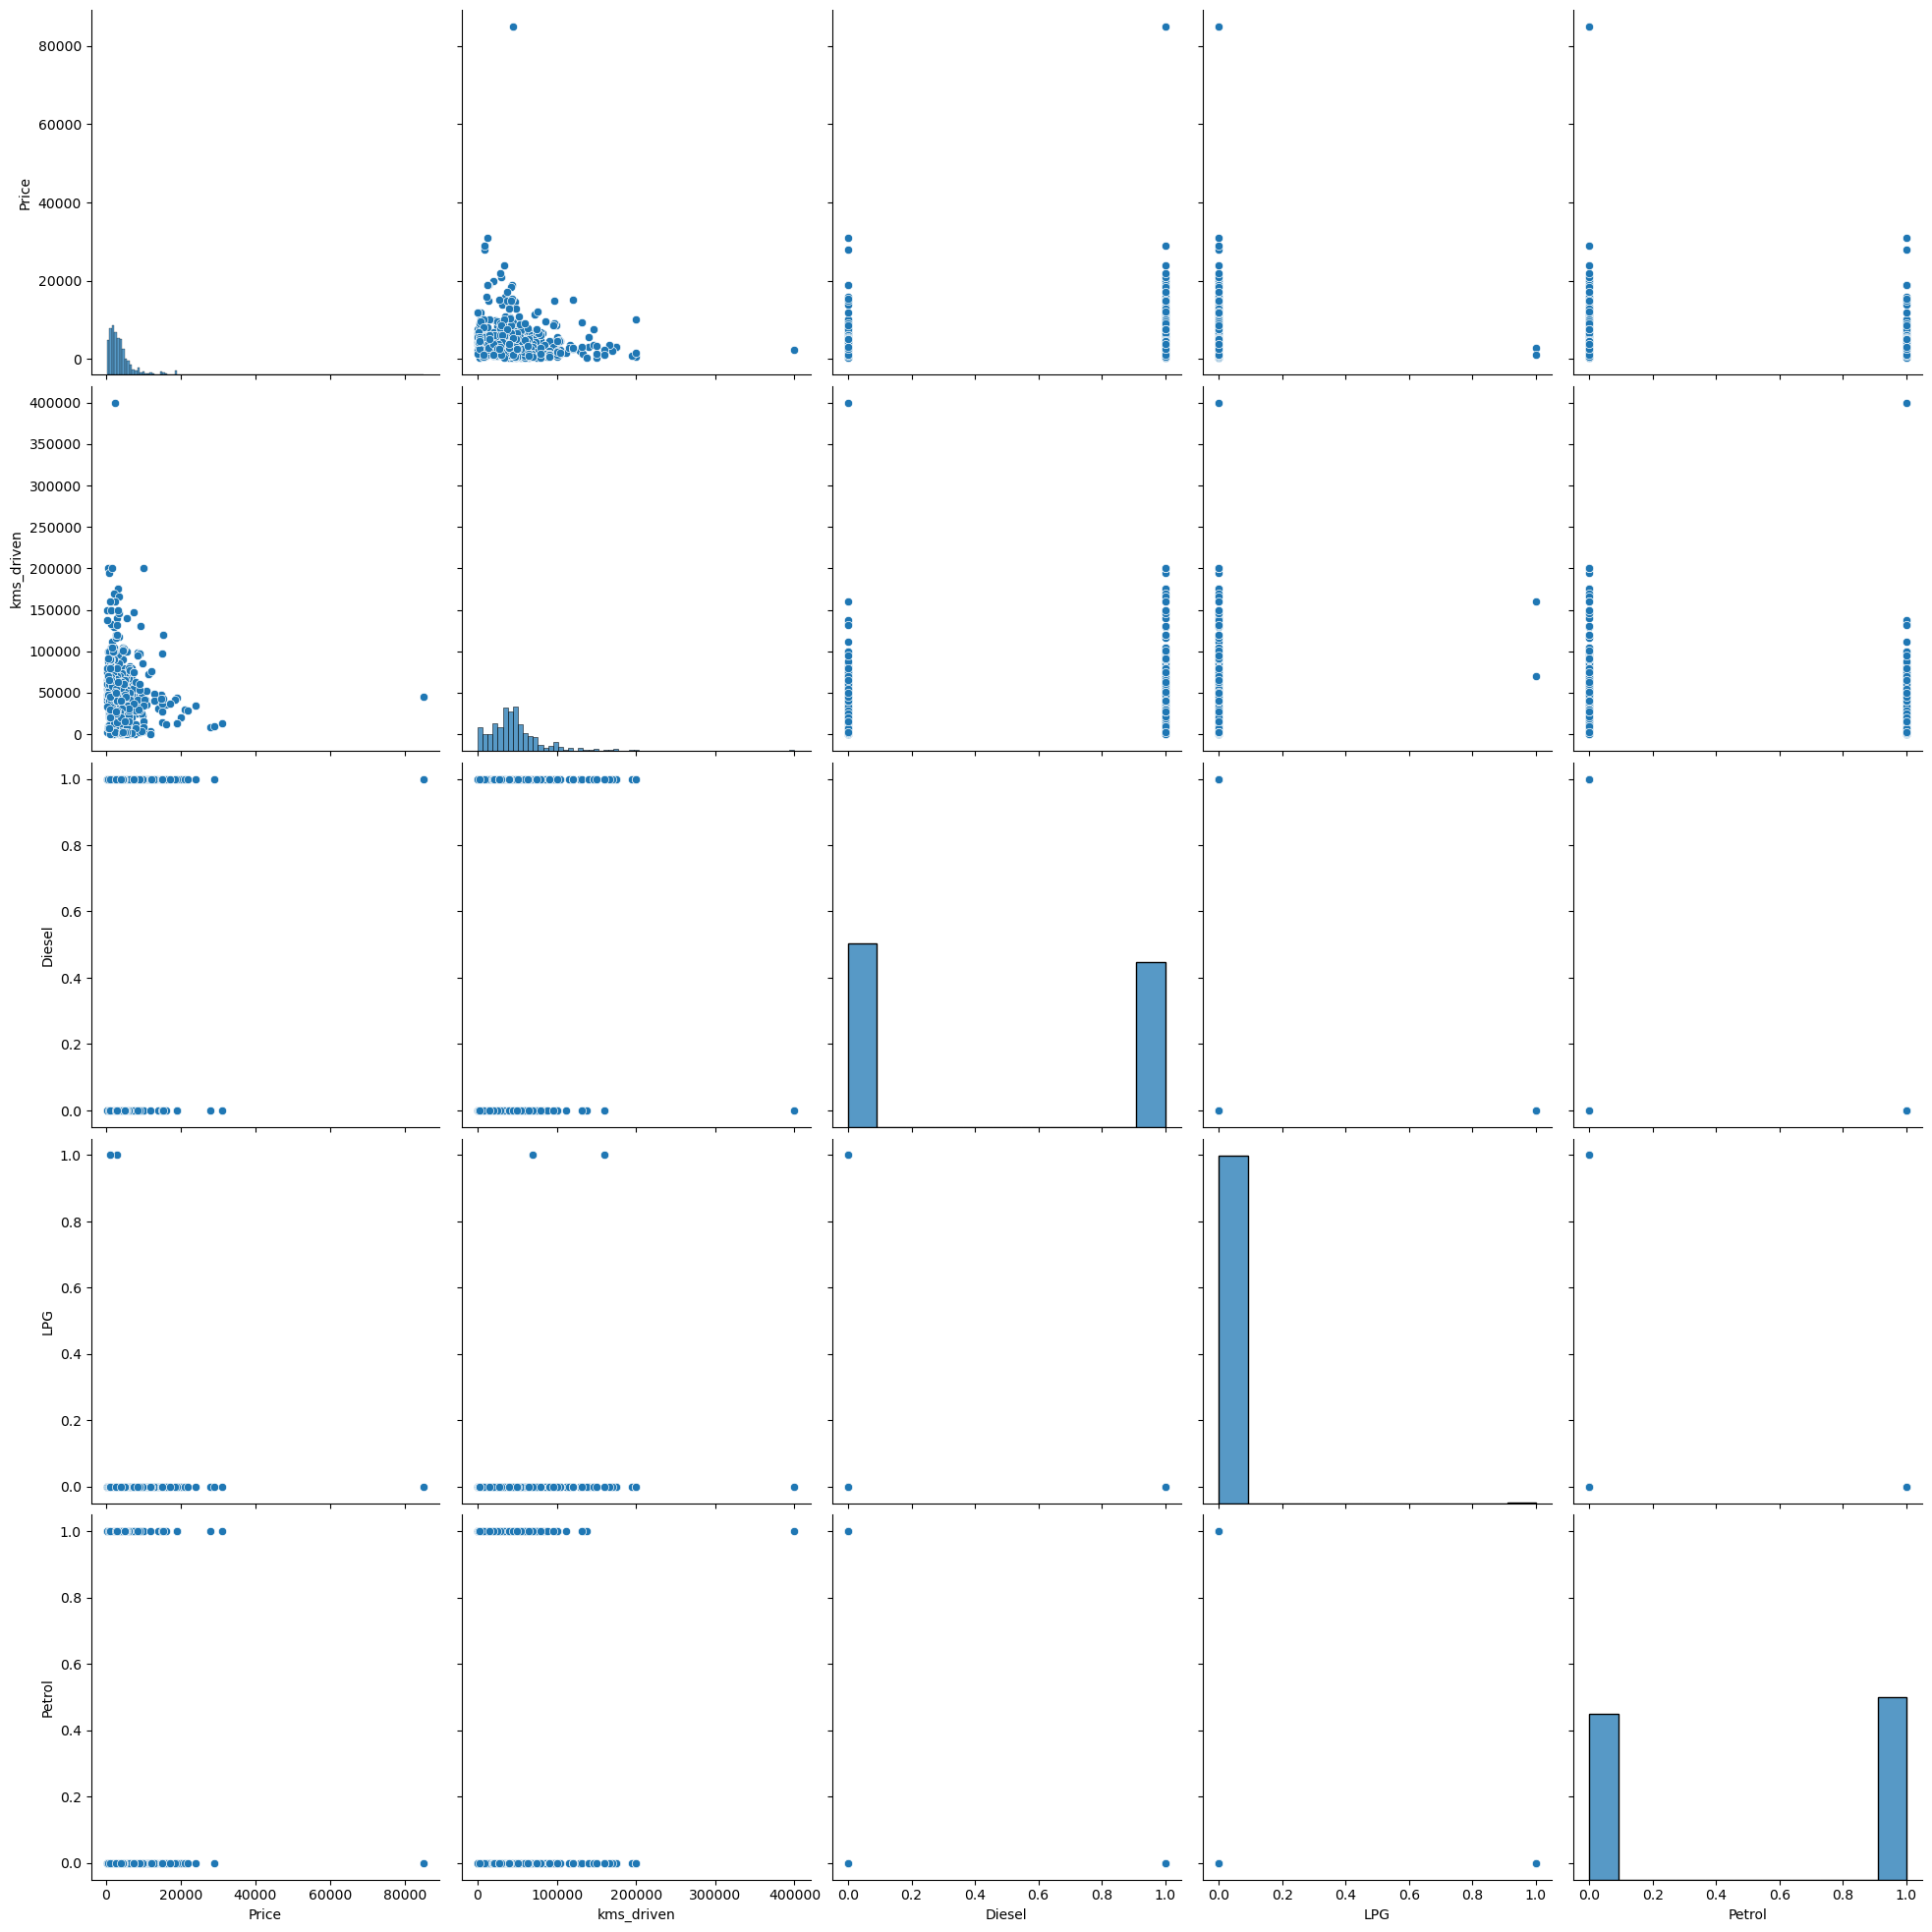

In [ ]:
import seaborn as sns
sns.pairplot(df,height=4,corner=False)

In [ ]:
one_hot=pd.get_dummies(df['house'])
df=df.drop('house',axis=1)
df = df.join(one_hot)
df=df.drop('name',axis=1)
df

,year,Price,kms_driven,Diesel,LPG,Petrol,Audi,BMW,Chevrolet,Datsun,...,Mercedes,Mini,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2007,800.0,45000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2006,4250.0,40,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2014,3250.0,28000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,5750.0,36000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2012,1750.0,41000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2011,2700.0,50000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
885,2009,1100.0,30000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
886,2009,3000.0,132000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
888,2018,2600.0,27000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
def get_high_correlation_columns(df, row_index=1, threshold=0.2):
    """
    Get a list of column names with absolute correlation greater than threshold.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame
    row_index (int): Index of the row to analyze in correlation matrix (default: 1)
    threshold (float): Absolute correlation threshold (default: 0.5)
    
    Returns:
    list: List of column names with high correlation
    """
    # Get correlation matrix row
    corr_row = df.corr(numeric_only=True).iloc[[row_index]]
    
    # Convert to Series for easier filtering
    corr_series = corr_row.iloc[0]
    
    # Filter for high correlations (both positive and negative)
    # and exclude self-correlation (which is always 1)
    high_corr_columns = corr_series[
        (abs(corr_series) > threshold) & 
        (corr_series != 1)
    ].index.tolist()
    
    return high_corr_columns

In [ ]:
df=df.apply(pd.to_numeric)
df

,year,Price,kms_driven,Diesel,LPG,Petrol,Audi,BMW,Chevrolet,Datsun,...,Mercedes,Mini,Mitsubishi,Nissan,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,2007,800.0,45000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2006,4250.0,40,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2014,3250.0,28000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,5750.0,36000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2012,1750.0,41000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2011,2700.0,50000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
885,2009,1100.0,30000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
886,2009,3000.0,132000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
888,2018,2600.0,27000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


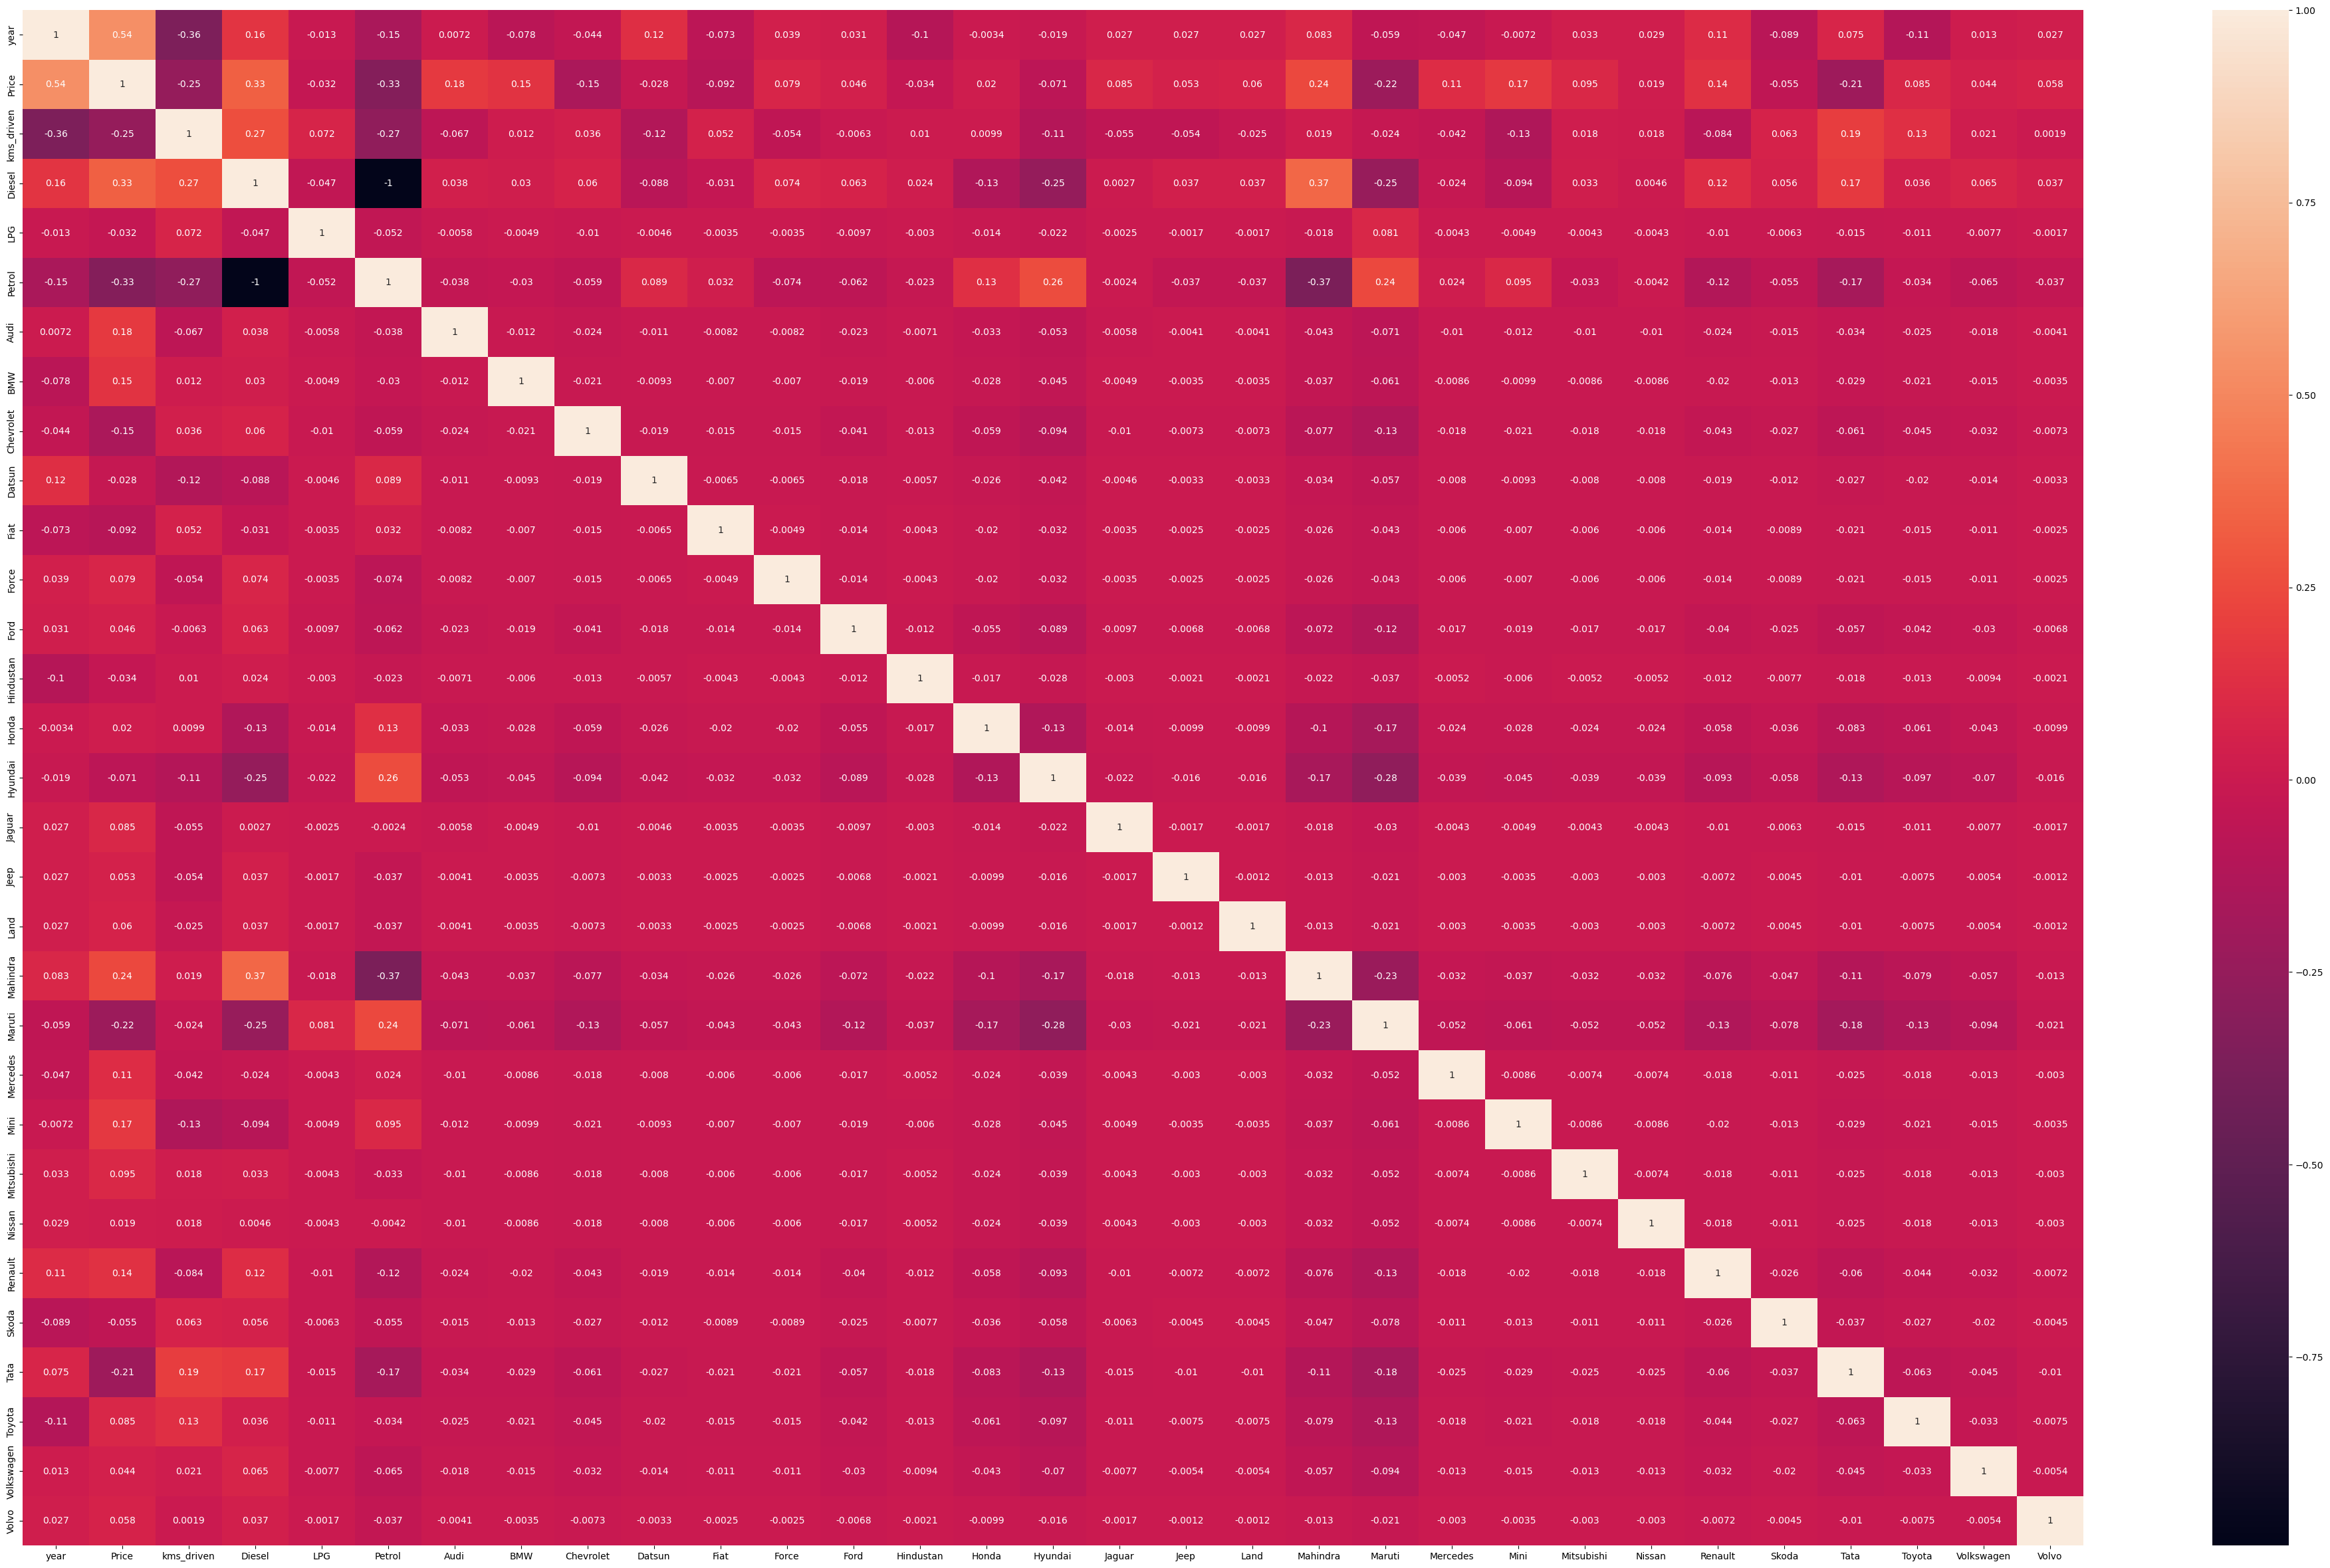

In [ ]:

import matplotlib.pyplot as plt
 
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(method='spearman'), annot=True)
plt.show()

In [ ]:
df.corr(method='spearman').iloc[1]

year          0.538141
Price         1.000000
kms_driven   -0.252006
Diesel        0.334903
LPG          -0.031565
Petrol       -0.331693
Audi          0.177257
BMW           0.147745
Chevrolet    -0.146556
Datsun       -0.027502
Fiat         -0.091885
Force         0.078924
Ford          0.046405
Hindustan    -0.033568
Honda         0.019834
Hyundai      -0.071078
Jaguar        0.084910
Jeep          0.052643
Land          0.059706
Mahindra      0.243267
Maruti       -0.222950
Mercedes      0.114273
Mini          0.166859
Mitsubishi    0.094999
Nissan        0.019213
Renault       0.137414
Skoda        -0.054785
Tata         -0.213583
Toyota        0.084643
Volkswagen    0.044331
Volvo         0.058071
Name: Price, dtype: float64

In [ ]:

#df_high_corr=df[['year','kms_driven','Diesel','Petrol','Mahindra','Maruti']]
df['old']=df['year'].apply(lambda x:(df['year'].max()-x))
df_high_corr=df.drop('Price',axis=1)
df_high_corr
df_test=pd.read_excel('/home/don/Desktop/FISTIC2024_FD/materialepreview/car_test.xlsx')
df_test=df_test.drop('Unnamed: 0',axis=1)
df_test=df_test.drop('fuel_type',axis=1)
df_test=df_test.drop('brand',axis=1)
df_test

,Price,kms_driven,old
0,800.0,45000,17
1,4250.0,40,18
2,3250.0,28000,10
3,5750.0,36000,10
4,1750.0,41000,12
...,...,...,...
812,3000.0,132000,15
813,2600.0,27000,6
814,3900.0,40000,11
815,1800.0,50000,10


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """ fitto il modello e lo valido con le metrice di regressione
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Misurazione errore
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # Cross validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    print(f"\nRisultati per {model_name}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.3f}")
    print(f"CV R2 Scores: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    return y_pred, r2

In [ ]:
def overfit_eval(model, X, y):

    """
    model: il nostro modello predittivo già addestrato
    X: una tupla contenente le prorietà del train set e test set (X_train, X_test)
    y: una tupla contenente target del train set e test set (y_train, y_test)
    """

    y_pred_train = model.predict(X[0])
    y_pred_test = model.predict(X[1])

    mse_train = mean_squared_error(y[0], y_pred_train)
    mse_test = mean_squared_error(y[1], y_pred_test)

    r2_train = r2_score(y[0], y_pred_train)
    r2_test = r2_score(y[1], y_pred_test)

    print("Train set:  MSE="+str(mse_train)+" R2="+str(r2_train))
    print("Test set:  MSE="+str(mse_test)+" R2="+str(r2_test))

In [ ]:
target = 'Price'
X = df_high_corr
y = df[target].values

In [ ]:
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,
                                                    test_size=0.3,
                                                    random_state=667,
                                                    )

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error

r2 = r2_score(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)

print(f'R2: {r2}')
print(f'RMSE: {rmse:.2f}')

R2: -2.6619348171040594e+24
RMSE: 6192842735311370.00


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import ElasticNet
alphas=[0.0001,0.001,0.01,0.1,1,10]
for i in alphas:
    elastic = ElasticNet(alpha=i, l1_ratio=0.5)
    print("Alpha="+str(i))
    elastic.fit(X_train, y_train)
    overfit_eval(elastic, (X_train, X_test),(y_train, y_test))
    y_pred_elastic, r2_elastic = evaluate_model(elastic, X_train, X_test, y_train, y_test, "Elastic Net")
    rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred_elastic) / y_test)), axis=0))
    print(rmspe)

Alpha=0.0001
Train set:  MSE=14732583.828340778 R2=0.4343845852982624
Test set:  MSE=6509789.213311676 R2=0.5481604523997012

Risultati per Elastic Net:
RMSE: 2551.43
R2 Score: 0.548
CV R2 Scores: 0.471 (+/- 0.372)
1.1119062570291864
Alpha=0.001
Train set:  MSE=14732586.65774606 R2=0.43438447667133995
Test set:  MSE=6502683.220231584 R2=0.5486536740069377

Risultati per Elastic Net:
RMSE: 2550.04
R2 Score: 0.549
CV R2 Scores: 0.472 (+/- 0.371)
1.1113023150792511
Alpha=0.01
Train set:  MSE=14732869.491188062 R2=0.4343736180903568
Test set:  MSE=6467737.809534495 R2=0.5510792085431084

Risultati per Elastic Net:
RMSE: 2543.17
R2 Score: 0.551
CV R2 Scores: 0.473 (+/- 0.371)
1.1051971191085666
Alpha=0.1
Train set:  MSE=14758117.503541972 R2=0.43340429287596505
Test set:  MSE=6207330.648362895 R2=0.569153872720414

Risultati per Elastic Net:
RMSE: 2491.45
R2 Score: 0.569
CV R2 Scores: 0.476 (+/- 0.371)
1.0524003268537658
Alpha=1
Train set:  MSE=15858049.355470909 R2=0.391175555688966
Test s

In [ ]:
elastic = ElasticNet(alpha=0.001, l1_ratio=0.5)

In [ ]:
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100
#Calculate the MAPE
result = mape(y_test,y_pred_elastic)
result

98.75751326853681

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(elastic, X_scaled, y)

print(scores.mean())

0.4841998108955833


In [ ]:
X=X.astype(int)
X.dtypes

year          int64
kms_driven    int64
Diesel        int64
LPG           int64
Petrol        int64
Audi          int64
BMW           int64
Chevrolet     int64
Datsun        int64
Fiat          int64
Force         int64
Ford          int64
Hindustan     int64
Honda         int64
Hyundai       int64
Jaguar        int64
Jeep          int64
Land          int64
Mahindra      int64
Maruti        int64
Mercedes      int64
Mini          int64
Mitsubishi    int64
Nissan        int64
Renault       int64
Skoda         int64
Tata          int64
Toyota        int64
Volkswagen    int64
Volvo         int64
old           int64
dtype: object

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Create dataset

# Initialize Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)

# Get the cost complexity path, impurities, and effective alpha
path = tree.cost_complexity_pruning_path(X_train, y_train)


# Train the final tree with the chosen alpha
final_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=0.1)
final_tree.fit(X_train, y_train)

# Make predictions
y_pred = final_tree.predict(X_test)

# Calculate and print RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")

RMSE: 3141.5489


In [ ]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,40,1):
    ranfor=RandomForestRegressor(max_depth=i)
    ranfor.fit(X_train,y_train)
    print(i)
    print(ranfor.score(X_train,y_train))
    print(ranfor.score(X_test,y_test))

1
0.13993176798061824
0.17516718628680827
2
0.2480257137466254
0.2509474814865249
3
0.34242732465745773
0.27004481047100237
4
0.42428465030076823
0.30161727960881635
5
0.53391610471902
0.3230846781414346
6
0.6656316051720099
0.3492297520991243
7
0.7350134450220456
0.3589265029807638
8
0.8149341055732373
0.35888415400594476
9
0.8406979690564262
0.38543911013971965
10
0.8537266470970151
0.4347781622148803
11
0.8402971525456407
0.4566655604981924
12
0.8474686356001059
0.4634645206777358
13
0.8715289525326259
0.47700737697987616
14
0.8634557267045729
0.4862829360280917
15
0.8832270774166631
0.5047078108929952
16
0.8851107399171209
0.48740975700527545
17
0.8951625982094269
0.4420346683694729
18
0.8773155970908123
0.5145966836773419
19
0.8770587808252654
0.5217720205995633
20
0.8698566910621611
0.504907751161543
21
0.9055052806236742
0.46808697729043036
22
0.8919272993431556
0.47596577374346405
23
0.8976241108417142
0.4749492400515717
24
0.8895033219776972
0.4931666755794576
25
0.90096408295

In [ ]:
X.columns

Index(['year', 'kms_driven', 'Diesel', 'LPG', 'Petrol', 'Audi', 'BMW',
       'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Hindustan', 'Honda',
       'Hyundai', 'Jaguar', 'Jeep', 'Land', 'Mahindra', 'Maruti', 'Mercedes',
       'Mini', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo', 'old'],
      dtype='object')

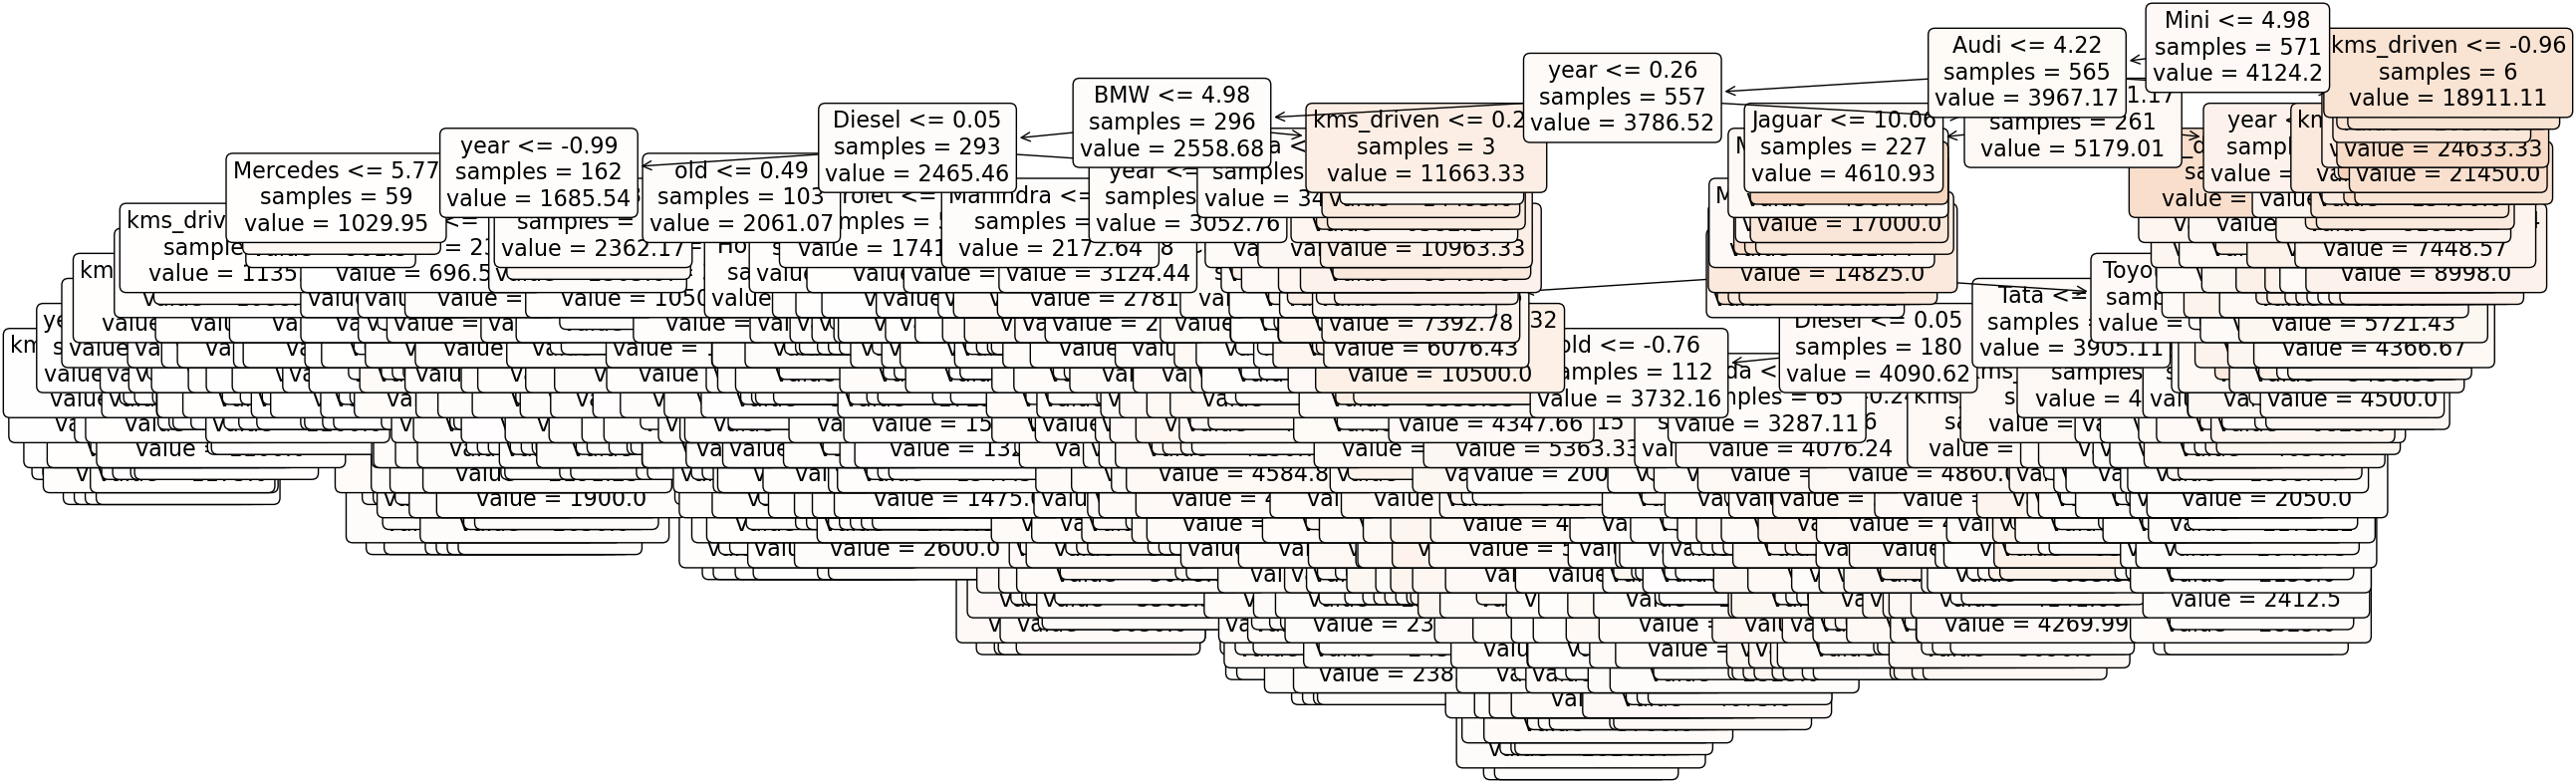

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Train the model
regr = DecisionTreeRegressor(random_state=42)
regr.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(26,8))
plot_tree(regr, feature_names=X.columns, filled=True, rounded=True, impurity=False, fontsize=16, precision=2)
plt.tight_layout()
plt.show()

In [ ]:
for i in range(1,30,1):
    regr = DecisionTreeRegressor(max_depth=i,random_state=42,criterion='poisson')
    regr.fit(X_train, y_train)
    print(i)
    print(regr.score(X_train,y_train))
    print(regr.score(X_test,y_test))

1
0.08081362022351801
0.0953644915165176
2
0.18705629215756314
0.10056054390159463
3
0.2851220323883129
0.11030072240569144
4
0.32380925696811347
-0.03556892155806257
5
0.3867627784396348
0.08050242035112387
6
0.4847627698515775
0.09320071201010915
7
0.83953124329544
0.15893105607875546
8
0.8587823216439857
0.2950088406439132
9
0.8716365633183754
0.20786336066198907
10
0.8843607563481584
0.3187404485949853
11
0.9014005753723677
0.33031663855655735
12
0.9326925974438318
0.22978894820249784
13
0.9502013358250578
0.38205175945097647
14
0.9587778612528655
0.32568022958437803
15
0.9652396942255564
0.41419704951459446
16
0.9728027018223804
0.32943263730300854
17
0.9776043710767837
0.3238994399390428
18
0.9826469406363199
0.3169775752006787
19
0.9868680434243953
0.4074491011187523
20
0.9906835760757411
0.3042528769609295
21
0.9942996317181144
0.30736523215342204
22
0.9964128876426234
0.37732590046379477
23
0.9978634673573308
0.36913424320724086
24
0.9982418603179324
0.37199306250405295
25
0.9

In [ ]:
for i in range(1,20,1):
    regr = DecisionTreeRegressor(max_depth=15,min_samples_leaf=i,random_state=42)
    regr.fit(X_train, y_train)
    print(i)
    print(regr.score(X_train,y_train))
    print(regr.score(X_test,y_test))

1
0.9664810741794287
0.33144228524308095
2
0.7139025573390141
0.3627339920904846
3
0.5495482352196829
0.08544511618828232
4
0.512425096394549
-0.046997232125657984
5
0.47311045267813623
0.1381680506669699
6
0.4500642443446715
0.033032632630003556
7
0.39793978724194057
0.08730485378291353
8
0.3736982820392869
0.07149465310980863
9
0.3566257759624015
0.22273755644226234
10
0.3392325880567135
0.17439144020387454
11
0.3209131353433732
0.15285664923759923
12
0.3088682082305938
0.1547224056088251
13
0.2916892594560623
0.16604836713546622
14
0.2644035995717594
0.2035277609477194
15
0.25685681729302157
0.17518984638166757
16
0.2556032035325
0.2475351110815761
17
0.2550586038089666
0.2474485912883636
18
0.2519888004717089
0.23429759780495718
19
0.25117104943651536
0.22644203486647518
